<a href="https://colab.research.google.com/github/Joe14th/MachineLearning/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
def NN(m1,m2,w1,w2,b):
  z = m1 * w1 + m2 * w2 + b
  return sigmoid(z)  #return 0-1 val

In [0]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [0]:
w1 = np.random.rand()
w2 = np.random.rand()
b = np.random.rand()

In [0]:
#measurements from farmer (0=1, 1=red)
#from red flower
NN(3, 1.5 , w1, w2 ,b)

0.6966143711841282

In [0]:
#blue flower, but showing red
NN(2, 1, w1, w2, b)

0.6378324159768831

In [0]:
#cost function + calculus
#takes farmers data (True value, 0 or 1) and our prediction = how bad our computer is doing
#and tells us how far our predictions are from what they should be
#we want to minimize this number => we are getting closer to right value
# ==> we have to change one input => predictions!

#squared error cost function = (prediction - target value)**2

#simple neural network
#NN() = b -> (b-4)**2 = cost(b) //4 is a random target value
#when above target value, slope is positive --> b-- (subtract slope of b)
#when below target value, slope is negative --> b++ (subtract slope of b)

#slope of the cost function at b?
#derivative of the cost function in respect to b
#b -= 0.1 * slope(b)
 
#the slope of f(x) as we change x

In [0]:
def cost(b):
  return (b-4)**2

In [0]:
cost(0)

16

In [0]:
cost(2)

4

In [0]:
cost(4) #at target

0

In [0]:
#approximated slope (the smaller h the closer)
def num_slope(b):
  h = 0.0001
  return (cost(b+h) - cost(b))/h  #slope

In [0]:
num_slope(3) #below target = -slope

-1.9999000000037181

In [0]:
num_slope(5) #above target = +slope

2.000099999994731

In [0]:
#now find actual slope (no approximation)
def slope(b):
  return 2 * (b-4) #chain + power rule of (b-4)**2

In [0]:
slope(3)

-2

In [0]:
slope(5)

2

In [0]:
b=8

In [0]:
#the more i run it the closer we get to target = 4
b = b - .1 * slope(b) #decrese b by a fraction of the slope
print(b)

4.8388608


In [0]:
b = 6
#training loop = changing cost and
#changing output of neural network to a target value
for i in range(10):
  b = b - .1 * slope(b)
  print(b)

5.6
5.279999999999999
5.023999999999999
4.8191999999999995
4.65536
4.524288
4.4194304
4.33554432
4.268435456000001
4.2147483648


In [0]:
#linear regression
#More complex neural network that takes 2 inputs representing a line (dog [#pats => #wags])

#wags = y, pats = y
#scatter plot of pats/wag looks like it follows a line
#wags(pats) = w*pats+b //equation for a line

#difference of what our model says vs what our data says
#wags(pats) - wags = wags(4) - 5 = 0.87 
#we want to minimize the squared difference (prediction - target)**2
#(wags(4)-5)**2 

#add up all squared difference = cost of all points
#we want this cost to be as close to 0 as we can

#partial derivative of big cost function in respect to w and b
#it will tell us how to change w and b

#new 3d graph with x=w,y=b,z=cost(w,b)
#find minimum point

#find slope of w and slope of b to know which way to move
#partial derivate with respect to w and b
#repetedly subtract fraction of slope

def dcdw(w,b):
  return 2(w*1+b-2)*1 + 2(w*2+b-4)*2 + 2*(w*4+b-5)*4

def dcdb(w,b):
  return 2(w*1+b-2) + 2(w*2+b-4) + 2*(w*4+b-5)

In [0]:
#solve original flower/petal problem
#    type
#    /   \
#length  width

#3d graph (x = length, z = width, y = color(x,z))

%matplotlib inline

In [0]:
from matplotlib import pyplot as plt
#numpy

In [0]:
#each point is length, width, type(blue=0,red=1)
data = [[3,   1.5,  1], 
        [2,   1,    0],
        [4,   1.5,  1],
        [3,   1,    0],
        [3.5, .5,   1],
        [2,   .5,   0],
        [5.5, 1,    1],
        [1,   1,    0]]

mystery_flower = [4.5,1]

In [0]:
#network architecture

#     o  flower type
#     /\  w1, w2, b
#    o  o  length, weight

#start of as random number
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

In [0]:
def sigmoid(x):  #squashes number to 0-1
  return 1/(1+np.exp(-x))

def d_sigmoid(x): #derivative of sigmoid
  return sigmoid(x) * (1-sigmoid(x))

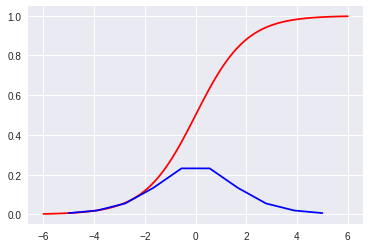

In [0]:
X = np.linspace(-6, 6, 100)
plt.plot(X, sigmoid(X), c='r') #
plt.plot(T, d_sigmoid(T), c='b') #slope of sigmoid is decreasing at >0

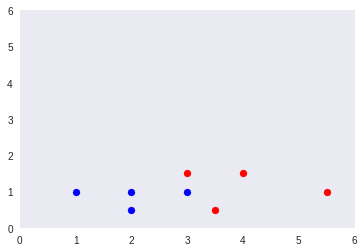

In [0]:
#scater plot
plt.axis([0,6,0,6])
plt.grid()
for i in range(len(data)):
  point = data[i]
  color = 'r'
  if point[2] == 0:
    color = 'b'
  plt.scatter(point[0], point[1], c = color)

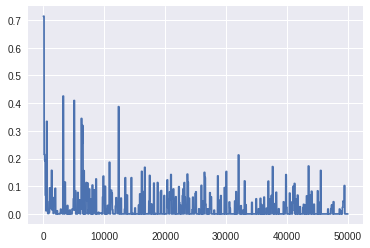

In [0]:
#network architecture

#     o  flower type
#     /\  w1, w2, b
#    o  o  length, weight

#start of as random number
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()


learning_rate = 0.2 #the size of the sigmoid fraction
costs = []

#training loop
for i in range(50000):
  ri = np.random.randint(len(data)) #random index
  point = data[ri]
  
  #weighted average
  z = point[0] * w1 + point[1] * w2 + b
  pred = sigmoid(z)
  
  target = point[2]
  cost = np.square(pred - target)
  
    
  #derivative of the cost with respect to prediction
  dcost_pred = 2*(pred-target)
  #derivative of prediction with respect to z
  dpred_dz = d_sigmoid(z)       
  
  #derivative of z with repect to w1     
  dz_dw1 = point[0]
  dz_dw2 = point[1]
  dz_db = 1
  
  dcost_dz = dcost_pred * dpred_dz
  #partial derivatives
  dcost_dw1 = dcost_dz * dz_dw1
  dcost_dw2 = dcost_dz * dz_dw2
  dcost_db = dcost_dz * dz_db
  
  w1 = w1 - learning_rate * dcost_dw1
  w2 = w2 - learning_rate * dcost_dw2
  b = b - learning_rate * dcost_db
  
  if i % 100 == 0:
    cost_sum = 0
    for j in range(len(data)):
      p=data[j]
      z = point[0] * w1 + point[1]*w2 + b
      pred = sigmoid(z)
      target = point[2]
      cost_sum += np.square(pred - target)
    
  costs.append(cost_sum/len(data))

plt.plot(costs)
#spikes caused by points on boundary

In [0]:
#seeing model predictions

for i in range(len(data)):
  point = data[i]
  print(point)
  z = point[0] * w1 + point[1] * w1 + b
  pred = sigmoid(z)
  print("pred: {}".format(pred))

[3, 1.5, 1]
pred: 0.9991606285207704
[2, 1, 0]
pred: 0.032682313797193115
[4, 1.5, 1]
pred: 0.9999992183237232
[3, 1, 0]
pred: 0.9731980772928973
[3.5, 0.5, 1]
pred: 0.9731980772928973
[2, 0.5, 0]
pred: 0.0010295572316521922
[5.5, 1, 1]
pred: 0.9999999992726631
[1, 1, 0]
pred: 3.143680414798843e-05


In [0]:
z  = mystery_flower[0]*w1 + mystery_flower[1]*w2 + b
pred = sigmoid(z)
pred

0.99996331802062

In [0]:
#import os

#from win32com.client import Dispatch
#speak = Dispatch("SAPI.SpVoice")

def which_flower(length, width):
  z  = length*w1 + width*w2 + b
  pred = sigmoid(z)
  if pred < .5:
    print("Blue")
    #speak.Speak("Blue")
    #os.system("say blue")
  else:
    print("Red")
    #speak.Speak("Red")
    #os.system("say red")

In [0]:
which_flower(1,1)

Blue
